In [66]:
import matplotlib.pyplot as plt 
import numpy as np 
import torch 
import model
import glob 
import scipy 

In [3]:
N = 300
dt = 0.0001
T = 10
w_in = 50 * 10**-12

fs = np.linspace(0.1,5,5)
for i in range(2,fs.shape[0]):
    f = fs[i]
    print(f)
    model.run(N,f,dt,T,w_in)
    

2.5500000000000003


100%|██████████| 99999/99999 [51:43<00:00, 32.22it/s]


3.7750000000000004


100%|██████████| 99999/99999 [52:37<00:00, 31.67it/s]   


5.0


100%|██████████| 99999/99999 [52:23<00:00, 31.82it/s]


# Load datas

In [43]:
w_in_list =[]
fs_list = []
for add in glob.glob("./data0/*.pt"):
    if add.split("_")[3] == "50.0.pt":
        fs_list.append(add)
    else:
        w_in_list.append(add)


In [44]:
N_values = [i for i in range(300,1100,100)]
Ns = [[],[],[],[],[],[],[],[]]
for add in glob.glob("./data/*.pt"):
    Ns[N_values.index(int(add.split("_")[0].split("/")[2]))].append(add)

In [98]:
spikes = torch.load(w_in_list[0]).type(torch.float64)
spikes


tensor([[1., 0., 0.,  ..., 1., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 1., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.float64)

num spikes :  tensor(148770., dtype=torch.float64)


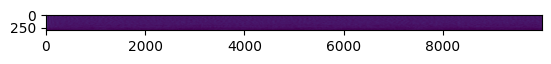

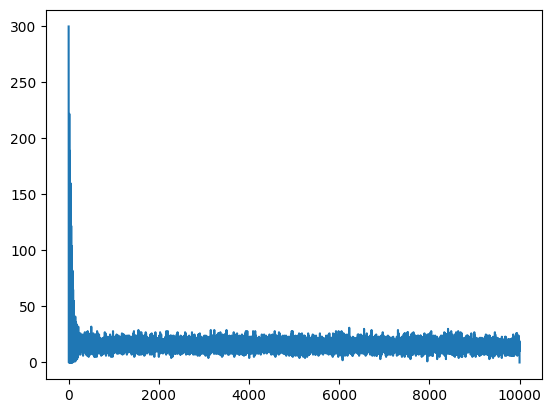

tensor(14.8770, dtype=torch.float64)
-0.18376515499698884


In [104]:


print("num spikes : ", torch.sum(spikes).cpu())
time_steps = spikes.shape[1]

plt.imshow(spikes[:,:].cpu())
plt.show()
plt.plot(torch.arange(time_steps)[:],spikes.sum(0)[:].cpu())
plt.show()
print(spikes.sum(0).mean().cpu())



avalanch = spikes.sum(0) != 0
slippingR = avalanch.roll(+1)
slippingL = avalanch.roll(-1)
slippingR[0] = False
slippingL[-1] = False

ends  = torch.logical_xor( avalanch ,(avalanch *slippingL))
starts  = torch.logical_xor( avalanch ,(avalanch *slippingR))

spikes_sum = torch.cumsum(spikes.sum(dim = 0),dim = 0)

avalanches_size = spikes_sum[torch.where(ends)[0]] - spikes_sum[torch.where(starts)[0]] + 1

nbins = 20
bins = np.exp(np.linspace(np.log(avalanches_size.cpu().min()), np.log(avalanches_size.cpu().max()) , nbins))
# bins = 50
freq,size = np.histogram(avalanches_size.cpu(),bins = bins)
size = (size[:-1] + size[1:])/2

slope , intercept, rvalue ,_,_= scipy.stats.linregress(np.log(size[freq != 0]),np.log(freq[freq != 0]))
print(slope)



In [105]:
freq

array([3, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

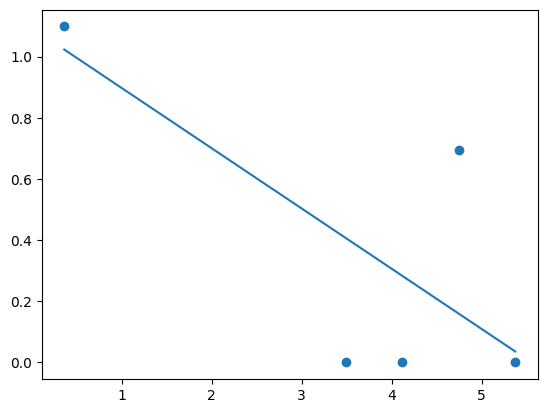

In [106]:


plt.scatter(np.log(size[freq != 0]),np.log(freq[freq != 0]))
plt.plot([np.log(size[freq != 0])[0],np.log(size[freq != 0][-1])],[intercept,intercept + slope * np.log(size[freq != 0][-1])])
# plt.text(6,4,f"slope = {np.round(slope,3)}")
plt.show()






-0.4535133618563941


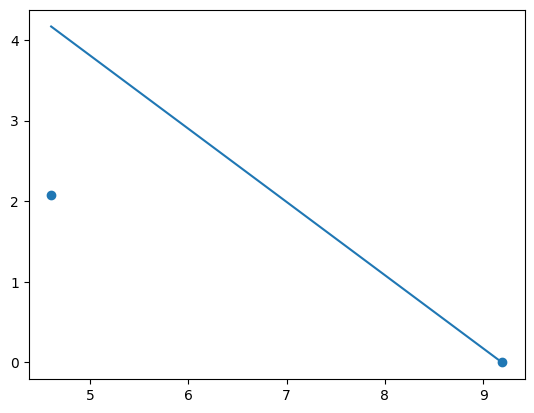

In [107]:

avalanches_steps = torch.where(ends) [0] -   torch.where(starts)[0] + 1


# nbins = 10
# bins = np.exp(np.linspace(np.log(avalanches_size.cpu().min()), np.log(avalanches_size.cpu().max()) , nbins))
bins = 50
freq,size = np.histogram(avalanches_steps.cpu(),bins = 50)
size = (size[:-1] + size[1:])/2


slope , intercept, rvalue ,_,_= scipy.stats.linregress(np.log(size[freq != 0]),np.log(freq[freq != 0]))
print(slope)


plt.scatter(np.log(size[freq != 0]),np.log(freq[freq != 0]))
plt.plot([np.log(size[freq != 0])[0],np.log(size[freq != 0][-1])],[intercept,intercept + slope * np.log(size[freq != 0][-1])])
# plt.text(6,4,f"slope = {np.round(slope,3)}")
plt.show()